# ベルマン方程式

```{math}
\DeclareMathOperator*{\argmax}{arg\,max}
\newcommand{\E}{{\mathrm E}}
\newcommand{\underE}[2]{\underset{\begin{subarray}{c}#1 \end{subarray}}{\E}\left[ #2 \right]}
\newcommand{\Epi}[1]{\underset{\begin{subarray}{c}\tau \sim \pi \end{subarray}}{\E}\left[ #1 \right]}
```

本章では，価値関数/行動価値関数が満たす再帰的な性質を基にした **ベルマン方程式(Bellman equation)** を紹介します．
この方程式は，現在の状態$s$の価値$V(s)$と次の状態$s'$の価値$V(s')$の関係に着目することにより得られる方程式で，
様々な強化学習アルゴリズムで利用されています．

## ベルマン方程式

価値関数の定義式{eq}`vpi difinition`と$G_t$に関する再帰的な式{eq}`g_t recursion`より以下のような式変形が行えます．

$$
V^\pi(s) &= \underE{\pi}{G_t | S_t = s}\\
&= \underE{\pi}{R_t + \gamma G_{t+1} | S_t = s}\\
&= \sum_{a \in \mathcal{A}} \pi(a|s) \left(r(s, a) + \gamma  \sum_{s' \in \mathcal{S}}  p(s'|s,a) \underE{\pi}{ G_{t+1} | S_{t+1} = s' }\right)\\
&= \sum_{a \in \mathcal{A}} \pi(a|s) \left( r(s,a) + \gamma \sum_{s' \in \mathcal{S}}  p(s'|s,a)V^\pi(s')  \right), \forall s \in \mathcal{S}
$$ (v_expansion)

この式変形は直感的に，「現在の状態の価値 ＝ （即時報酬 ＋ 次の状態の価値）の期待値」としたものであると捉えることが出来ます．

同様の式変形を行動価値関数に関しても適用できます．

$$Q^\pi(s,a) &= \underE{\pi}{G_t | S_t = s, A_t = a}\\
&= \underE{\pi}{R_t + \gamma G_{t+1} | S_t = s, A_t = a}\\
&= r(s,a) + \gamma \sum_{s' \in \mathcal{S}} p(s'|s,a) \sum_{a' \in \mathcal{A}} \pi(a'|s') Q^\pi(s', a'), \forall s \in \mathcal{S}, a \in \mathcal{A}$$ (q_expansion)


これらの式変形より，$V^\pi$は関数$v : \mathcal{S} \rightarrow \mathbb{R}$に関する方程式


$$v(s)
=\sum_{a \in \mathcal{A}} \pi(a|s) \left( r(s,a) + \gamma \sum_{s' \in \mathcal{S}} p(s'|s,a)v(s') \right), \forall s \in \mathcal{S}$$ (bellman_v)

の解であることがわかり，
$Q^\pi$は関数$q : \mathcal{S} \times \mathcal{A} \rightarrow \mathbb{R}$に関する方程式

$$q(s,a)
= r(s,a) + \gamma \sum_{s' \in \mathcal{S}} p(s'|s,a) \sum_{a' \in \mathcal{A}} \pi(a'|s') q(s', a'), \forall s \in \mathcal{S}, a \in \mathcal{A}$$ (bellman_q)

の解であることがわかります．
方程式{eq}`bellman_v`,{eq}`bellman_q`はベルマン方程式と呼ばれています．

これらの方程式の嬉しいところは，
環境が既知であるならば，
<font color='red'>$V^\pi,Q^\pi$を求める問題を方程式{eq}`bellman_v`,{eq}`bellman_q`の解を求める問題と捉えることが出来る</font>ことです．

また，式{eq}`vpi qpi relation`の結果と式{eq}`q_expansion`より

$$Q^\pi(s,a) &= r(s,a) + \gamma \sum_{s' \in \mathcal{S}} p(s'|s,a) \sum_{a' \in \mathcal{A}} \pi(a'|s') Q^\pi(s', a')\\
& = r(s,a) + \gamma \sum_{s' \in \mathcal{S}} p(s'|s,a) V^\pi(s'), \forall s \in \mathcal{S}, a \in \mathcal{A}$$ (vpi qpi relation2)

が成り立つ，つまり，$V^\pi$が求まれば$Q^\pi$も求まるため本節では主に価値関数についてのみ扱います．


### ベルマン作用素

ベルマン方程式をより深く分析するため，ベルマン方程式を基にした **ベルマン作用素(Bellman operator)** というものを導入します．

ベルマン作用素は，ある関数$v : \mathcal{S} \rightarrow \mathbb{R}$に対する写像$B_\pi: \mathbb{R}^{|\mathcal{S}|} \rightarrow \mathbb{R}^{|\mathcal{S}|}$であり，

$$(B_\pi(v))(s) := \sum_{a \in \mathcal{A}} \pi(a|s) \left( r(s,a) + \gamma \sum_{s' \in \mathcal{S}}  p(s'|s,a)v(s')  \right), \forall s \in \mathcal{S}$$

と定義されます．

このベルマン作用素を用いて，式{eq}`bellman_v`のベルマン方程式を以下のように書き表せます．

$$v = B_\pi(v), \forall s \in \mathcal{S}$$

このように，ある作用素に対して$v = B(v)$のような関係を成り立たせる$v$を**不動点(fixed-point)** と呼びます．

また，この作用素は同じ関数に k 回適用した場合，つまり$B( \cdots B(B(v)))$とした場合$B^k(v)$のように表記します．

このベルマン作用素に対して以下の命題が成り立ちます．

<!-- ```{prf:proposition} $B_\pi$の収束性
:label: b_pi_convergence

任意の有界関数$v:\mathcal{S} \rightarrow \mathbb{R}$に対して，ベルマン作用素$B_\pi$を繰り返し適用した関数$(B_\pi^k v)$は価値関数$V^\pi$に漸近的に等しくなる．

$$V^\pi(s) = \lim_{k\rightarrow \infty} (B_\pi^k(v))(s), \forall s \in \mathcal{S}$$

``` -->

<!-- ```{prf:proposition} $B_\pi$の不動点の一意性
:label: b_pi_fixed_point

以下のベルマン方程式

$$v = B_\pi(v), \forall s \in \mathcal{S}$$

を満たす解は価値関数$V^\pi$ただ一つである．

``` -->

```{prf:proposition}
:label: b_pi_fixed_point

ベルマン作用素$B_\pi$は，

$$v^* = B_\pi(v^*), \forall s \in \mathcal{S}$$

を満たす唯一の不動点$v^*$を持つ．
また，任意の有界関数$v_0:\mathcal{S} \rightarrow \mathbb{R}$
に対して$B_\piを繰り返し適用すると漸近的に不動点に等しくなる．

$$v^*(s) = \lim_{k\rightarrow \infty} (B_\pi^k(v_0))(s), \forall s \in \mathcal{S}$$

```

```{prf:proof}
$B_\pi$が最大ノルムに対して縮小写像であることを示すことを示すことにより，
[バナッハの不動点定理](https://ja.wikipedia.org/wiki/%E3%83%90%E3%83%8A%E3%83%83%E3%83%8F%E3%81%AE%E4%B8%8D%E5%8B%95%E7%82%B9%E5%AE%9A%E7%90%86)より，
ベルマン作用素が唯一の不動点を持ち，
任意の$v$にベルマン作用素を繰り返し適用することで，不動点に漸近的に等しくなることがわかります．
詳しくは追記します．
```

$V^\pi$はベルマン作用素の不動点の一つであること，ベルマン作用素は不動点を一つしか持たないことより，$V^\pi$はベルマン作用素の唯一の不動点(ベルマン方程式の唯一解)であると言えます．

これらの命題より，環境の情報が既知である場合
  (solve_bellman_operator)=
  1. $v = B_\pi(v), \forall s \in \mathcal{S}$を直接解く
  2. 任意の関数$v$に対して$B_\pi$を繰り返し適用する

の2通り方法で$V^\pi$を得ることが出来ます．

### 実装

本節では，前節のコンセプトを基にした手法の実装を示し，
実際に[FrozenLake](https://www.gymlibrary.ml/environments/toy_text/frozen_lake/)環境に適用してみます．


In [45]:
import gym

env = gym.make(
    "FrozenLake-v1",
    desc=["SFFF", "FHFH", "FFFH", "HFFG"],
    map_name="4x4",
)


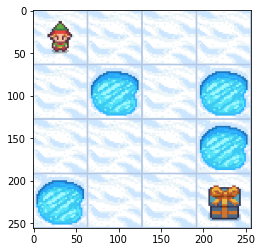

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

env.reset()

plt.imshow(env.render(mode='rgb_array'))


まずは，実装上扱いやすくするために，ベルマン方程式{eq}`bellman_v`を，行列形式(テーブル型)に変換してみます．
状態空間$\mathcal{S}$は有限であるため，
関数$v : \mathcal{S} \rightarrow \mathbb{R}$は，以下のようなベクトル$v \in \mathbb{R}^{|\mathcal{S}|}$と等価であるとみなすことが出来ます．

$$
v = \left(
\begin{array}{c}
v(s_0)\\
v(s_1)\\
\vdots\\
v(s_{|\mathcal{S}|})
\end{array}
\right),\ \mathcal{S} = \{s_0, s_1, \cdots s_{|\mathcal{S}|}\}
$$

価値関数以外にも，環境の情報も行列形式にすることが可能です．報酬の期待値$g(s) = \sum_{a \in \mathcal{A}} \pi(a|s) r(s,a)$も価値関数と同様にベクトル$g \in \mathbb{R}^{|\mathcal{S}|}$とします．

$$
g = \left(
\begin{array}{c}
g(s_0)\\
g(s_1)\\
\vdots\\
g(s_{|\mathcal{S}|})
\end{array}
\right),\ \mathcal{S} = \{s_0, s_1, \cdots s_{|\mathcal{S}|}\}
$$

方策$\pi$上で状態$s$から$s'$に遷移する確率$P_\pi(s,s') = \sum_{a \in \mathcal{A}} \pi(a|s) p(s'|s,a)$を[確率行列](https://ja.wikipedia.org/wiki/%E7%A2%BA%E7%8E%87%E8%A1%8C%E5%88%97) $P_\pi \in \mathbb{R}^{|\mathcal{S}| \times |\mathcal{S}|}$とします．

$$
P_\pi = \left(
\begin{array}{ccc}
    P_\pi(s_0, s_0)               & \cdots & P_\pi(s_0, s_{|\mathcal{S}|})               \\
    \vdots                        & \ddots & \vdots                                      \\
    P_\pi(s_{|\mathcal{S}|}, s_0) & \cdots & P_\pi(s_{|\mathcal{S}|}, s_{|\mathcal{S}|})
  \end{array}
\right),\ \mathcal{S} = \{s_0, s_1, \cdots s_{|\mathcal{S}|}\}
$$

これらの行列を用いてベルマン方程式{eq}`bellman_v`を書き表すと，

$$v = g + \gamma P_\pi v$$ (bellman_eq_matrix_ver)

となり，一般的な行列計算として実装上でも扱いやすい形となります．

[FrozenLake](https://www.gymlibrary.ml/environments/toy_text/frozen_lake/)環境において，行動を一様ランダムに選択，つまり$\pi(a|s) = \frac{1}{4}$とした場合の環境情報$g, P_\pi$を求めると以下のようになります．


In [47]:
import numpy as np

np.set_printoptions(threshold=16)

state_size = env.observation_space.n
action_size = env.action_space.n


# FrozenLakeの内部実装を参考に，状態遷移関数を作成する
def p(sp, s, a):
    """状態遷移関数

    Args:
        sp : 次の状態 s'
        s  : 現在の状態 s
        a  : 現在の状態で選択する行動 a

    Returns:
        sでaを選択した後s'に遷移する確率
    """
    transition = env.P[s][a]
    prob = 0.0
    for t in transition:
        if t[1] == sp:
            prob += t[0]
    return prob

# FrozenLakeの内部実装を参考に，報酬関数を作成する
def r(s, a):
    """報酬関数

    Args:
        s  : 現在の状態 s
        a  : 現在の状態で選択する行動 a

    Returns:
        報酬r(s,a)
    """
    transition = env.P[s][a]
    reward = 0.0
    for t in transition:
        reward += t[0] * t[2]
    return reward


def pi(a, s):
    """方策"""
    return 1.0 / 4.0


P = np.zeros((state_size, state_size))

for s in range(state_size):
    for sp in range(state_size):
        P[s, sp] = np.sum([pi(a, s) * p(sp, s, a) for a in range(action_size)])

g = np.zeros((state_size,))

for s in range(state_size):
    g[s] = np.sum([pi(a, s) * r(s, a) for a in range(action_size)])


In [48]:
print(f"P = \n{P}")


P = 
[[0.5  0.25 0.   ... 0.   0.   0.  ]
 [0.25 0.25 0.25 ... 0.   0.   0.  ]
 [0.   0.25 0.25 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.25 0.25 0.  ]
 [0.   0.   0.   ... 0.25 0.25 0.25]
 [0.   0.   0.   ... 0.   0.   1.  ]]


In [49]:
print(f"g = \n{g}")


g = 
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.25 0.  ]


これらをもとに[前述の 2 つの手法](solve_bellman_operator)を用いて，価値関数を求めていきます．


まずは，ベルマン方程式を直接解く手法により，価値関数を求めます．
式{eq}`bellman_eq_matrix_ver`の方程式の解は

$$v = (I - \gamma P_\pi)^{-1}g$$

となるため，この式を用いて解を求めます．


In [50]:
GAMMA = 0.99  # 割引率
v1 = np.linalg.inv(np.eye(state_size, state_size) - GAMMA * P) @ g

print(f"v1 =\n{v1}")


v1 =
[ 1.23561373e-02  1.04244610e-02  1.93384359e-02  9.47774828e-03
  1.47870516e-02 -2.28588108e-16  3.88944494e-02 -6.52373983e-16
  3.26024740e-02  8.43376421e-02  1.37810854e-01  0.00000000e+00
 -2.05408145e-16  1.70344822e-01  4.33579442e-01  0.00000000e+00]


次に，ベルマン作用素を繰り返し適用する手法を実装します．
任意の関数`v2`(ここではゼロで初期化)に$B_\pi$を繰り返し適用し，価値関数を求めると以下のようになります．


In [51]:
v2 = np.zeros((state_size,))  # 価値関数の初期値

v2_log = [v2]  # ログ保存用のリスト

for _ in range(50):
    v2 = g + GAMMA * P @ v2  # ベルマン作用素により更新
    v2_log.append(v2)  # ログを保存

print(f"v2 =\n{v2}")


v2 =
[0.01235348 0.01042258 0.01933677 0.00947646 0.01478549 0.
 0.0388938  0.         0.03260156 0.08433709 0.13781037 0.
 0.         0.17034441 0.43357905 0.        ]


2 つの手法で求めた解を比べると以下のようになります．


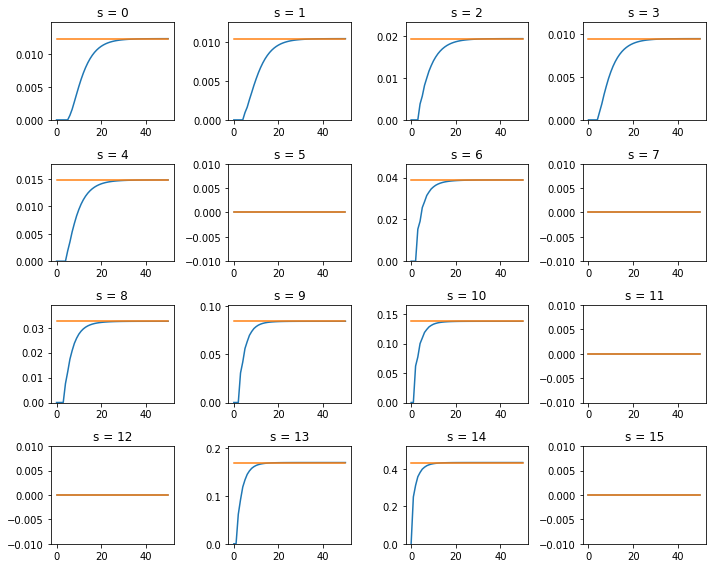

In [52]:
v2_log = np.array(v2_log)

plt.figure(figsize=(10, 8))

for i in range(state_size):
    plt.subplot(4, 4, i + 1)
    plt.plot(v2_log[:, i])
    plt.plot([v1[i] for _ in v2_log[:, i]])
    if abs(v1[i]) < 1e-5:
        plt.ylim(-0.01, 0.01)
    else:
        plt.ylim(0.0, v1[i] * 1.2)
    plt.title(f"s = {i}")

plt.tight_layout()


(bellman_opt_eq)=
## ベルマン最適方程式

これまでは，任意の方策に対する価値関数/ベルマン方程式を見てきました．
本章では，これまで紹介してきたものを用いて **最適方策** を導入していきます．

### 最適方策

最適方策は以下のように定義されます．

```{prf:definition}
:label: optimal_policy

任意の初期状態$s \in \mathcal{S}$からの期待リターンを最大化する方策$\pi^*$を最適方策と呼ぶ．
最適方策$\pi^*$の価値関数$V^{\pi^*}(s) = V^*(s)$は任意の方策$\pi$に対して以下が成り立つ

$$V^*(s) \geq V^\pi(s),\ \forall s$$

```

また，最適方策の価値関数 $V^{\pi^*}(s) = V^*(s)$ を最適価値関数と呼びます．
この最適方策の定義は，全ての初期状態からの期待リターンを最大化するものであり，
単一の初期分布からの期待リターンを評価関数とし，それを最大化するだけではないのです．
しかし，このような条件を満たす最適方策は本当に存在するのでしょうか？
結論から言うと，最適方策は存在し(これは複数存在する可能性あり)，それらは一意の最適価値関数を持ちます．

以下それを説明していきます．


### ベルマン最適方程式

```{prf:proposition} 方策の改善
:label: policy_improvement

任意の方策$\pi$に対して，

$$\pi'(a|s) = \delta_{a,\mu(s)},\ \ \text{where }
\mu(s) = \argmax_{a} Q^\pi(s,a)$$

とした場合，

$$V^{\pi'}(s) \geq V^\pi(s), \forall s$$

となる．

```

```{prf:proof}

任意の$s\in\mathcal{S}$に対して

$$
V^\pi(s) &\leq Q^\pi(s,\mu(s))\\
&=\underE{}{R_t + \gamma V^\pi(S_{t+1})  |  S_t=s, A_t = \mu(s)}\\
&=\underE{\pi'}{R_t + \gamma V^\pi(S_{t+1}) |  S_t=s}\\
&\leq \underE{\pi'}{R_t + \gamma Q^\pi(S_{t+1}, \mu(S_{t+1}))  |  S_t=s}\\
&=\underE{\pi'}{R_t + \gamma \underE{}{R_{t+1} + \gamma V^\pi(S_{t+2}) | S_{t+1}, A_{t+1} = \mu(S_{t+1}) }  |  S_t=s}\\
&= \underE{\pi'}{R_t + \gamma R_{t+1} + \gamma^2 V^\pi(S_{t+2}) |  S_t=s}\\
&\vdots\\
&= \underE{\pi'}{R_t + \gamma R_{t+1} + \gamma^2 R_{t+2} + \gamma^3 R_{t+3} + \cdots | S_t = s }\\
&= V^{\pi'}(s)
$$

が成り立つため，{prf:ref}`policy_improvement`は成立する．

```

{prf:ref}`policy_improvement`より，$\pi$を$\pi'(a|s) = \delta_{a,\mu(s)}$と更新した際，$\pi'$は$\pi$より良くなることがわかります．
また，状態空間/行動空間が有限であるため方策も有限です．
そのため，方策を改善し続けると，いつかはそれ以上改善しない方策にたどり着き，その方策の価値関数$v^*$に対して

$$
v^*(s) &= \max_{a \in \mathcal{A}} q^*(s,a)\\
&= \max_{a\in\mathcal{A}} \left(r(s,a) + \gamma \sum_{s' \in \mathcal{S}} p(s'|s,a) v^*(s') \right), \forall s \in \mathcal{S}$$ (bellman_opt_v)

が成り立つことがわかります．また，行動価値関数に関しても，

$$q^*(s,a) &= r(s,a) + \gamma \sum_{s' \in \mathcal{S}} p(s'|s,a) v^*(s')\\
&= r(s,a) + \gamma \sum_{s' \in \mathcal{S}} p(s'|s,a) \max_{a' \in \mathcal{A}} q^*(s',a'), \forall s \in \mathcal{S}, a \in \mathcal{A}$$ (bellman_opt_q)

が成り立ちます．式{eq}`bellman_opt_v`,{eq}`bellman_opt_q`は最適ベルマン方程式と呼ばれます．
{prf:ref}`optimal_policy`から，最適価値関数も最適ベルマン方程式を満たします．

また，これら方程式を満たす価値関数に対して，

$$\pi^*(a|s) = \delta_{a,\mu^*(s)},\ \ \text{where }
\mu^*(s) = \argmax_{a} q^*(s,a)
$$ (opt_policy)

とした方策の価値関数は$v^*$になります．


### ベルマン最適作用素

前節で最適価値関数がベルマン最適方程式を満たすことを示しました．
本節では前章と同様にベルマン最適方程式をもとにした， **ベルマン最適作用素(Bellman optimality operator)** を導入します．

ベルマン最適作用素は，ある関数$v : \mathcal{S} \rightarrow \mathbb{R}$に対する写像$B_*: \mathbb{R}^{|\mathcal{S}|} \rightarrow \mathbb{R}^{|\mathcal{S}|}$であり，

$$(B_*(v))(s) := \max_{a\in\mathcal{A}} \left(r(s,a) + \gamma \sum_{s' \in \mathcal{S}} p(s'|s,a) v(s') \right), \forall s \in \mathcal{S}$$

と定義されます．

このベルマン最適作用素を用いて，式{eq}`bellman_opt_v`のベルマン最適方程式を以下のように書き表せます．

$$v = B_*(v), \forall s \in \mathcal{S}$$

このベルマン作用素に対して以下の命題が成り立ちます．

```{prf:proposition}
:label: bellman_opt_fixed_point

ベルマン最適作用素$B_*$は，

$$v^* = B_*(v^*), \forall s \in \mathcal{S}$$

を満たす唯一の不動点$v^*$を持つ．
また，任意の有界関数$v_0:\mathcal{S} \rightarrow \mathbb{R}$
に対して$B_*$を繰り返し適用すると漸近的に不動点に等しくなる．

$$v^*(s) = \lim_{k\rightarrow \infty} (B_*^k(v_0))(s), \forall s \in \mathcal{S}$$

```

```{prf:proof}
$B_\pi$と同様，$B_*$が最大ノルムに対して縮小写像であることを示すことを示すことにより，
[バナッハの不動点定理](https://ja.wikipedia.org/wiki/%E3%83%90%E3%83%8A%E3%83%83%E3%83%8F%E3%81%AE%E4%B8%8D%E5%8B%95%E7%82%B9%E5%AE%9A%E7%90%86)より，
この命題が示されます．
詳しくは追記します．
```

この命題や，今までの議論をまとめると

1. {prf:ref}`policy_improvement`により任意の方策を改善できる
2. 方策が有限であることより，方策の改善を繰り返すとこれ以上改善できない方策に行き着く
3. これ以上改善できない方策の価値関数はベルマン最適方程式を満たす
4. {prf:ref}`bellman_opt_fixed_point`よりベルマン最適方程式の解は一意に定まる

ことにより，

1. 最適価値関数$V^*$はベルマン方程式の唯一解となる
2. $\pi^*(a|s) = \delta_{a,\mu^*(s)},\ \ \text{where }\mu^*(s) = \argmax_{a} Q^*(s,a)$は最適方策となる

ことがわかります．


## 動的計画法

**動的計画法(Dynamic Programing; DP)** とは，対象とするマルコフ過程の完全な情報を用いて最適方策を求める手法を指します．

本章では[前章](bellman_opt_eq)をもとに動的計画法の一種である2つの手法，

1. **価値反復(Value Iteration)**
2. **方策反復(Policy Iteration)**

を紹介します．

### 価値反復

この手法の基本的な方針は，

- 式{eq}`bellman_opt_v`のベルマン最適方程式を解いて，
- 式{eq}`opt_policy`により，最適価値関数から最適方策を導く

というものです．
まず最初のベルマン最適方程式の求解に関して，[ベルマン方程式を解く手法](solve_bellman_operator)と同様，直接解くか，任意の関数に$B_*$を繰り返し適用するかの2通りの手法が考えられます．
しかし，ベルマン最適作用素は単純な線形変換ではなく$\max_{a\in\mathcal{A}}\cdots$と，最大値をとる操作があるため，方程式は直接解けません．
なので$B_*$を繰り返し適用する方針で解を求めていきます．

それでは，価値反復を[FrozenLake](https://www.gymlibrary.ml/environments/toy_text/frozen_lake/)に実装して見ましょう．

まずは，ベルマン最適作用素を関数として実装します．

In [53]:
def bellman_optimality_operator(v):
    """ベルマン最適作用素

    Args:
        v : 価値関数

    Returns:
        B*(v)
    """
    q = np.zeros((state_size, action_size))  # 行動価値関数
    for s in range(state_size):
        for a in range(action_size):
            q[s, a] = r(s, a) + GAMMA * np.sum(
                [p(sp, s, a) * v[sp] for sp in range(state_size)]  # spは次状態s'を表す
            )  # 行動価値関数を計算

    return q.max(axis=1)  # 行動価値の最大値が


このベルマン作用素を任意の$v$(ここでは0で初期化)に繰り返し適用すると，最適価値関数が求まります．

In [54]:
v = np.zeros((state_size,))

for _ in range(1000):
    v = bellman_optimality_operator(v)

print(f"v =\n{v}")


v =
[0.54202593 0.49880319 0.47069569 0.4568517  0.55845096 0.
 0.35834807 0.         0.59179874 0.64307982 0.61520756 0.
 0.         0.74172044 0.86283743 0.        ]


また，最適価値関数から，行動価値関数を作ることによって，最適方策(ここでは`mu`)を導けます．


In [55]:
q = np.zeros((state_size, action_size))

for s in range(state_size):
    for a in range(action_size):
        q[s, a] = r(s, a) + GAMMA * np.sum(
            [p(sp, s, a) * v[sp] for sp in range(state_size)]
        )

mu = q.argmax(axis=1)

print(f"q =\n{q}")
print(f"mu =\n{mu}")


q =
[[0.54202593 0.52776243 0.52776243 0.52234217]
 [0.34347361 0.33419814 0.31993463 0.49880319]
 [0.43818949 0.43362098 0.4243455  0.47069569]
 ...
 [0.45698409 0.5295041  0.74172044 0.49695269]
 [0.73252259 0.86283743 0.82108818 0.78111957]
 [0.         0.         0.         0.        ]]
mu =
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]


得られた方策は以下のようになります．

In [1]:
def plot_policy(mu):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.set_xlim(-1, 9)
    ax.set_ylim(-1, 9)

    for i in range(5):
        ax.plot([i * 2, i * 2], [0, 8], color="b")
        ax.plot([0, 8], [i * 2, i * 2], color="b")

    dx = [-1, 0, 1, 0]
    dy = [0, -1, 0, 1]

    for i in range(4):
        for j in range(4):
            n = i * 4 + j
            x = 1 + j * 2
            y = 7 - i * 2
            a = mu[n]
            ax.arrow(
                x,
                y,
                dx[a],
                dy[a],
                head_width=0.3,
                head_length=0.2,
                length_includes_head=True,
            )

    ax.axis("equal")
    plt.show()

plot_policy(mu)

NameError: name 'mu' is not defined

### 方策反復

この手法は，ベルマン最適方程式を直接解くのではなく，
{prf:ref}`policy_improvement`を用いて，
任意の決定的な初期方策を改善して最適方策に近づいていく手法です．
ただし，方策を改善するためには，その方策の価値関数が必要なため，この手法は，

1. 方策の価値関数を求める
2. それを用いて方策を改善する

という２つの処理を繰り返します．

先程と同様[FrozenLake](https://www.gymlibrary.ml/environments/toy_text/frozen_lake/)に実装して見ましょう．

まずは，方策(ここでは決定的方策$\mu$)に対してベルマン方程式を解く関数を実装します．ここでは，式{eq}`bellman_eq_matrix_ver`を直接解く方針で価値関数を求めます．

In [56]:
def solve_bellman_equation(mu):
    """ベルマン方程式を解いて価値関数を求める

    Args:
        mu : 決定的方策

    Returns:
        価値関数
    """
    P = np.zeros((state_size, state_size))  # 確率行列
    g = np.zeros((state_size,))  # 報酬ベクトル

    # 報酬ベクトルと確率行列を求める
    for s in range(state_size):
        g[s] = r(s, mu[s])
        for sp in range(state_size):
            P[s, sp] = p(sp, s, mu[s])

    A = np.eye(state_size, state_size) - GAMMA * P
    b = g

    # 線形方程式を解くことにより価値関数を求める．
    return np.linalg.solve(A, b)


次に，求めた価値関数から，方策を改善する関数を実装します．

In [57]:
def improve_policy(v):
    """方策の改善

    Args:
        v : 価値関数

    Returns:
        改善された方策
    """
    q = np.zeros((state_size, action_size))  # 行動価値関数
    for s in range(state_size):
        for a in range(action_size):
            q[s, a] = r(s, a) + GAMMA * np.sum(
                [p(sp, s, a) * v[sp] for sp in range(state_size)]
            )

    return q.argmax(axis=1)  # 行動価値が最大となる行動を求める


これらをもとに任意の決定的方策を方策反復により更新すると以下のようになります．

In [ ]:
for _ in range(100):
    v = solve_bellman_equation(mu)
    mu = improve_policy(v)

print(f"v =\n{v}")
print(f"mu =\n{mu}")


得られた方策は以下のようになります．

In [ ]:
plot_policy(mu)